In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot
#from Levenshtein import distance as lev
from random import randint
from scipy.stats import norm

# Explore

In [2]:
dataframe = pd.read_csv('../Documents/BD/Log.csv')

In [3]:
dataframe.head()

,# id,dateadded,url,url_status,threat,tags,urlhaus_link,reporter
0,1510905,2021-08-06 11:05:09,http://115.58.41.152:58759/Mozi.m,online,malware_download,"elf,Mozi",https://urlhaus.abuse.ch/url/1510905/,lrz_urlhaus
1,1510904,2021-08-06 11:05:08,http://115.56.142.226:35605/Mozi.m,online,malware_download,"elf,Mozi",https://urlhaus.abuse.ch/url/1510904/,lrz_urlhaus
2,1510903,2021-08-06 11:05:06,http://115.51.21.34:41813/Mozi.m,online,malware_download,"elf,Mozi",https://urlhaus.abuse.ch/url/1510903/,lrz_urlhaus
3,1510902,2021-08-06 11:04:41,http://112.27.124.111:50811/Mozi.m,offline,malware_download,"elf,Mozi",https://urlhaus.abuse.ch/url/1510902/,lrz_urlhaus
4,1510901,2021-08-06 11:03:03,https://cdn.discordapp.com/attachments/8667560...,online,malware_download,None,https://urlhaus.abuse.ch/url/1510901/,JAMESWT_MHT


In [4]:
dataframe['dateadded'] = pd.to_datetime(dataframe['dateadded'])

In [5]:
dataframe.describe(include='all')

/home/stucki/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,# id,dateadded,url,url_status,threat,tags,urlhaus_link,reporter
count,7.868400e+04,78684,78684,78684,78684,78684,78684,78684
unique,NaN,59218,78684,2,1,346,78684,50
top,NaN,2021-07-25 01:52:05,http://115.58.41.152:58759/Mozi.m,offline,malware_download,"elf,Mozi",https://urlhaus.abuse.ch/url/1510905/,lrz_urlhaus
freq,NaN,10,1,72955,78684,57534,1,56514
first,NaN,2021-07-07 00:03:04,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2021-08-06 11:05:09,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.471430e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.272629e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.432078e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.451752e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='dateadded', ylabel='count'>

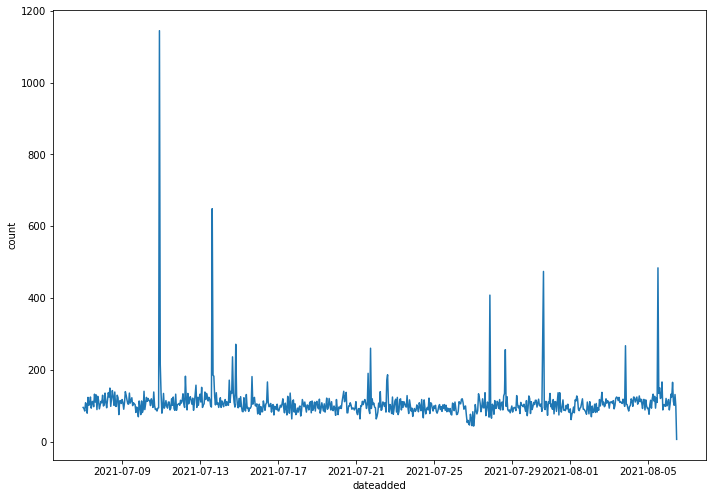

In [6]:
df_ts = dataframe.groupby([pd.Grouper(key='dateadded',freq='H')]).size().reset_index(name='count')

a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(ax=ax, data=df_ts, x="dateadded", y="count")

In [7]:
df_ts['count'].mean()

107.49180327868852

In [8]:
df_ts

,dateadded,count
0,2021-07-07 00:00:00,95
1,2021-07-07 01:00:00,92
2,2021-07-07 02:00:00,85
3,2021-07-07 03:00:00,108
4,2021-07-07 04:00:00,101
...,...,...
727,2021-08-06 07:00:00,112
728,2021-08-06 08:00:00,101
729,2021-08-06 09:00:00,131
730,2021-08-06 10:00:00,99


# Clustering (hors sujet CH)

In [9]:
dataframe['date_round'] = pd.Series(np.array(dataframe.dateadded, dtype='datetime64[h]'))

In [10]:
indexes_of_greatest_pics = df_ts['count'].sort_values()[-4:].index

for index in indexes_of_greatest_pics:
    timestamp = df_ts.iloc[index]['dateadded']
    data = dataframe[dataframe['date_round'] == timestamp1]

In [11]:
index1 = df_ts[df_ts['count'] == df_ts['count'].max()]['dateadded'].index[0]
timestamp1 = df_ts.iloc[index1]['dateadded']
data_max = dataframe[dataframe['date_round'] == timestamp1]

In [12]:
random_index = randint(1, 732)
timestamp2 = df_ts.iloc[random_index]['dateadded']
data_2 = dataframe[dataframe['date_round'] == timestamp2]

In [13]:
data_2.shape

(82, 9)

In [14]:
tab1 = data_max.url.to_numpy()

# Levenshtein (hors sujet CH)

In [15]:
indexes_of_greatest_pics = df_ts['count'].sort_values()[-4:].index
indexes_of_greatest_pics

Int64Index([567, 708, 159, 94], dtype='int64')

# Decile

In [16]:
pourcentage = 50

In [17]:
number_values = df_ts.shape[0]

In [18]:
df_ts_sorted = df_ts.sort_values(by = ['count'])

In [19]:
too_low_values = df_ts_sorted[:number_values//pourcentage]
too_high_values = df_ts_sorted[-number_values//pourcentage:]

In [20]:
too_low_values_threshold = df_ts_sorted[:number_values//pourcentage]['count'].iloc[-1]
too_high_values_threshold = df_ts_sorted[-number_values//pourcentage:]['count'].iloc[0]

In [21]:
avg = df_ts_sorted['count'].mean()

In [22]:
def custom_status(count):
    if count > avg:
        return 1
    else:
        return 0

In [23]:
frames = [too_low_values, too_high_values]
alert_values = pd.concat(frames)
alert_values['status'] = alert_values.apply(lambda x: custom_status(x['count']) ,axis=1)

In [24]:
df_ts['max_threshold'] = df_ts.apply(lambda x: too_high_values_threshold,axis=1)
df_ts['min_threshold'] = df_ts.apply(lambda x: too_low_values_threshold,axis=1)

<AxesSubplot:xlabel='dateadded', ylabel='count'>

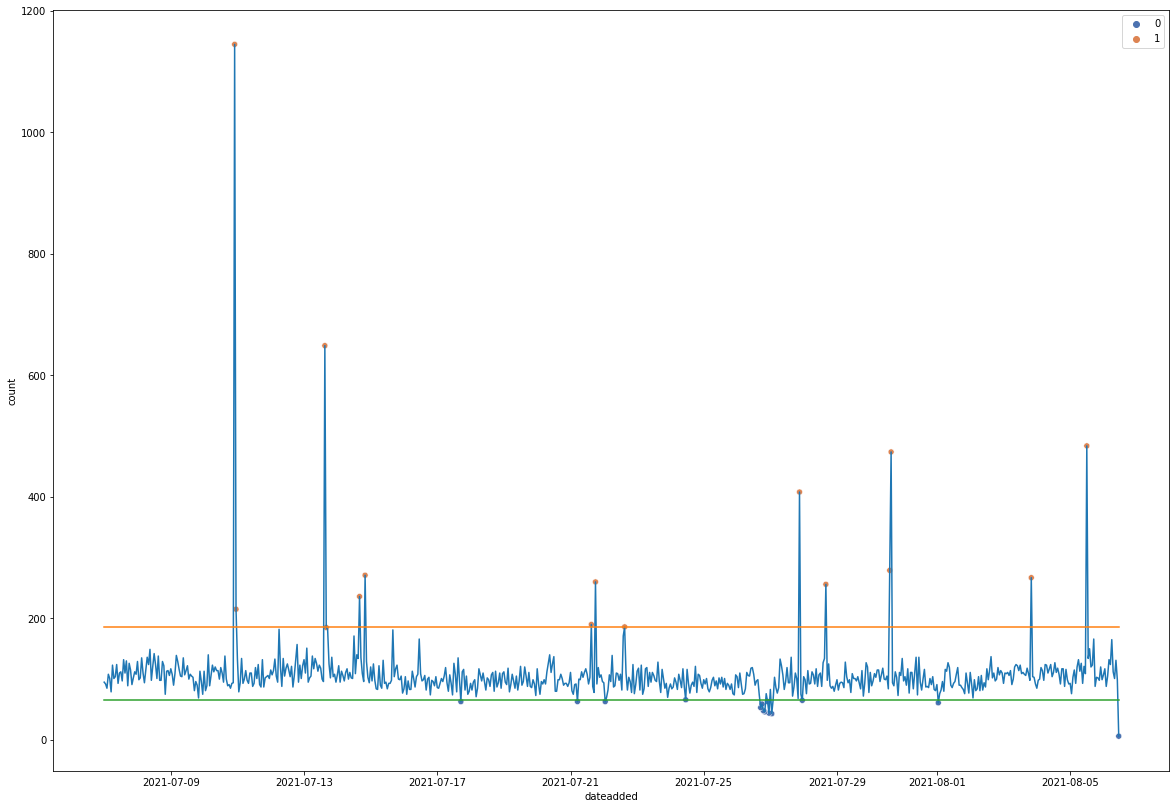

In [25]:
dims = (20, 14)
fig, ax = pyplot.subplots(figsize=dims)
sns.scatterplot(ax=ax, data=alert_values, x="dateadded", y="count", hue='status', palette="deep")
sns.lineplot(ax=ax, data=df_ts, x="dateadded", y="count")
sns.lineplot(ax=ax, data=df_ts, x="dateadded", y="max_threshold")
sns.lineplot(ax=ax, data=df_ts, x="dateadded", y="min_threshold")

In [26]:
num_alertes = too_high_values.shape[0] + too_low_values.shape[0]
num_alertes

29

# Distrib

In [27]:
df_ts_sorted = df_ts['count'].sort_values()

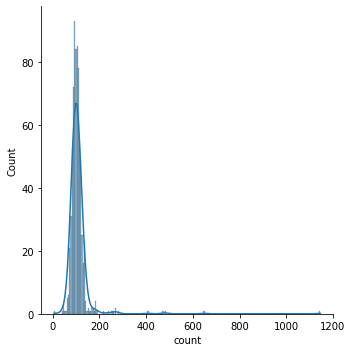

In [28]:
sns.displot(df_ts, x = 'count', kde = True, height = 5, aspect = 1)

In [29]:
mu, std = norm.fit(df_ts['count'])

In [30]:
borne_max = mu + 2*std
borne_min = mu - 2*std

In [31]:
N1 = df_ts[df_ts['count'] > borne_max].shape[0]
N2 = df_ts[df_ts['count'] < borne_min].shape[0]

In [32]:
N1 + N2

11

<AxesSubplot:xlabel='dateadded', ylabel='count'>

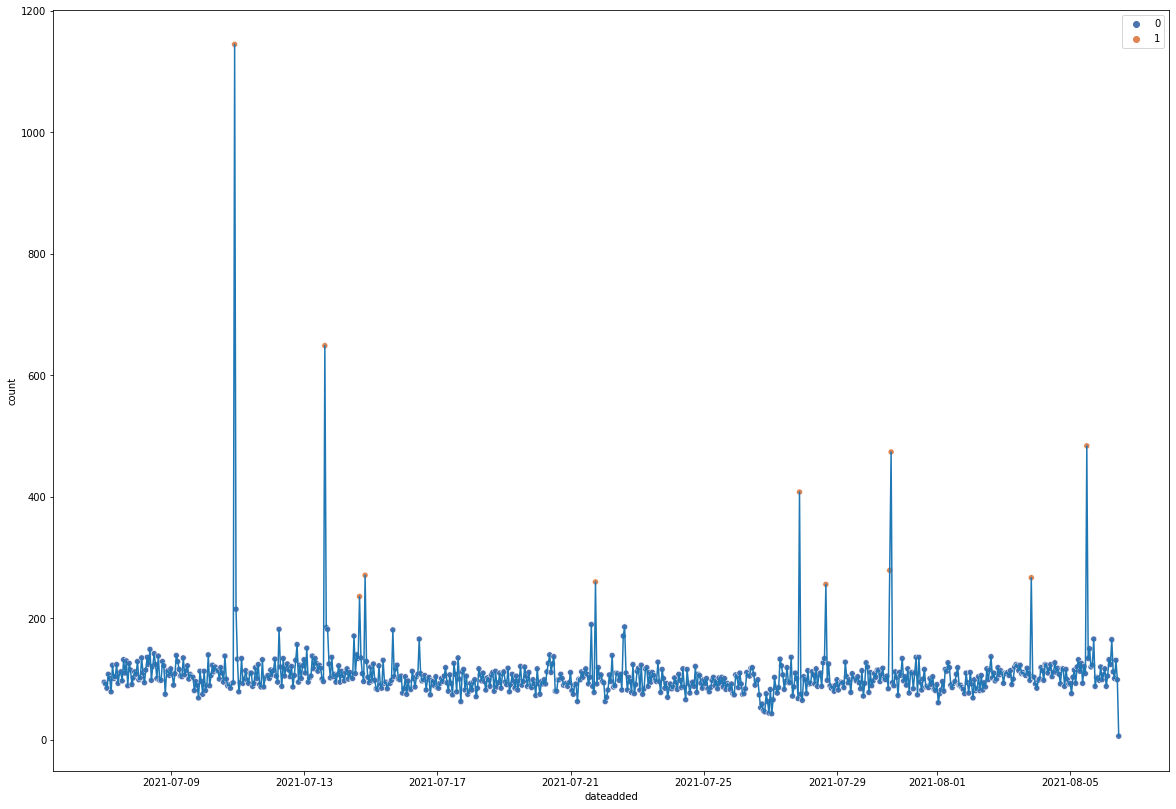

In [33]:
def custom_status(count):
    if count > borne_max or count < borne_min:
        return 1
    else:
        return 0

#frames = [too_low_values, too_high_values]
#alert_values = pd.concat(frames)
df_ts['status'] = df_ts.apply(lambda x: custom_status(x['count']) ,axis=1)

dims = (20, 14)
fig, ax = pyplot.subplots(figsize=dims)
sns.scatterplot(ax=ax, data=df_ts, x="dateadded", y="count", hue='status', palette="deep")
sns.lineplot(ax=ax, data=df_ts, x="dateadded", y="count")

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

In [34]:
occ_reporter = dataframe['reporter'].value_counts()
dataframe_reporter = pd.DataFrame(occ_reporter[:10]).reset_index()
occ_reporter[:10]

lrz_urlhaus      56514
geenensp          9108
Gandylyan1        3013
Cryptolaemus1     1977
Petras_Simeon     1734
tolisec           1709
tammeto           1407
zbetcheckin       1084
abuse_ch           516
switchcert         484
Name: reporter, dtype: int64

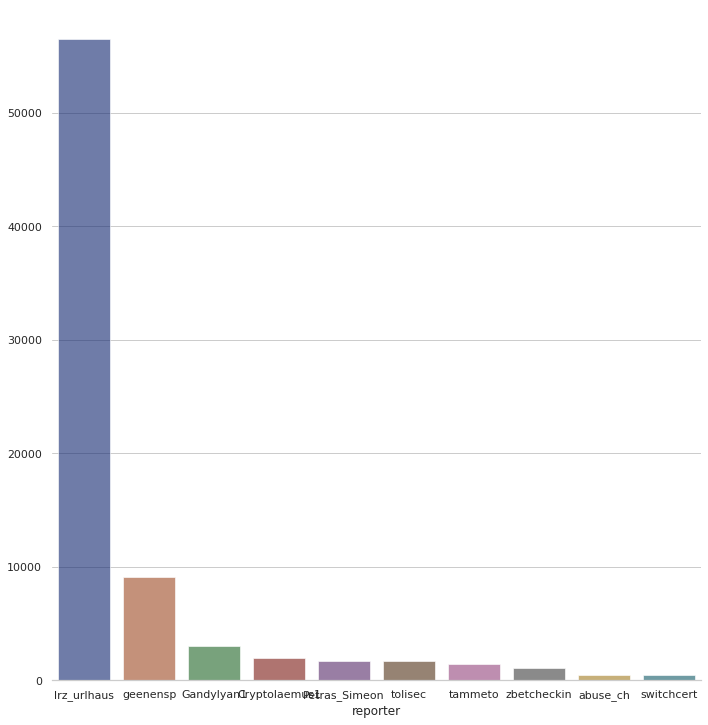

In [35]:
sns.set_theme(style="whitegrid")

g = sns.catplot(
    data=dataframe_reporter,x ="index",y="reporter", kind="bar",ci="sd", palette="dark", alpha=.6, height=10
)

g.despine(left=True)
g.set_axis_labels("reporter", "")